In [1]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [2]:
from function import split_data
import pandas as pd

data = pd.read_csv("dataset_reduced.csv")
X_train, X_test, y_train, y_test = split_data(data, 'Cs')

In [3]:
from sklearn.preprocessing import StandardScaler

# 数据标准化
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from tabpfn import TabPFNRegressor

model = TabPFNRegressor(device=device)
model.fit(X_train, y_train)

# 预测
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

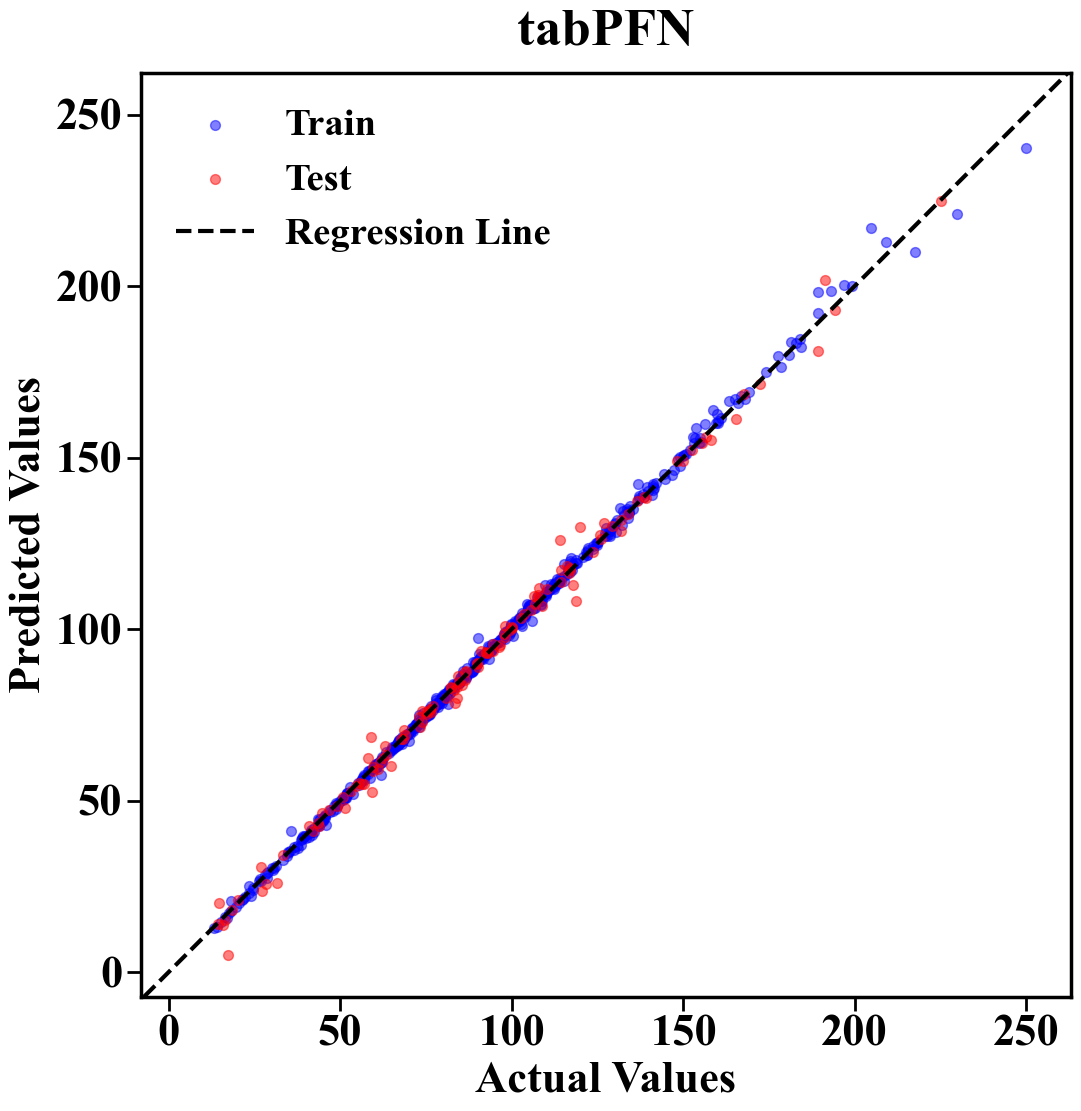

,model,R2_train,MAE_train,MAPE_train,RMSE_train,R2_test,MAE_test,MAPE_test,RMSE_test
0,tabPFN,0.999,0.883,1.069,1.536,0.994,1.934,3.337,3.168


In [5]:
from function import metrics_to_dataframe, plot_actual_vs_predicted

# 绘制实际值与预测值图
plot_actual_vs_predicted(y_train, y_train_pred, y_test, y_test_pred, 'tabPFN', 'tabPFN.png')

# 计算并显示评估指标
tabpfn_metrics = metrics_to_dataframe(y_train, y_train_pred, y_test, y_test_pred, 'tabPFN').round(3)
tabpfn_metrics